# Linear Regression - Iris Dataset

### Objective
The objective is to perform a correlation and regression analysis using the Iris dataset as an example.

## 1. What is (linear) regression?
The main purpose of **regression analysis** is to establish the form and study the relationship between variables. Understanding some relationship may allow information about one variable to be used to predict the values of another variable.

Usually, the least squares method is used to obtain the equation of the sample **regression line**.

In simple linear regression with one independent variable $ x $ and one dependent variable $ y $, the formula is:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

where:
- $ y $ is the dependent variable (**target**),
- $ x $ is the independent variable,
- $ \beta_0 $ is the intercept,
- $ \beta_1 $ is the coefficient (**slope**),
- $ \epsilon $ is the error term.

The coefficients $ \beta_0 $ and $ \beta_1 $ are computed using the formulas:

$$ \beta_1 = \frac{\text{Cov}(x, y)}{\text{Var}(x)} = r_{xy} \cdot \frac{\sigma_y}{\sigma_x} $$

$$ \beta_0 = \bar{y} - \beta_1 \bar{x} $$

where:
- $ \text{Cov}(x, y) $ is the covariance between $ x $ and $ y $,
- $ \text{Var}(x) $ is the variance of $ x $,
- $ r_{xy} $ is the correlation coefficient between $ x $ and $ y $,
- $ \sigma_x $ and $ \sigma_y $ are the standard deviations of $ x $ and $ y $,
- $ \bar{x} $ and $ \bar{y} $ are the means of $ x $ and $ y $, respectively.

These coefficients $ \beta_0 $ and $ \beta_1 $ determine the intercept and slope of the linear regression line that minimizes the sum of squared residuals in the simple linear regression model.

## 2. Linear regression in machine learning

**Linear regression** is also used in **machine learning** to model the relationship between dependent and independent variables by fitting a linear equation to observed data. The basic functions used in this code are:

**Train_test_split**: This function splits a dataset into training and testing subsets. The training set is used to train the model, while the testing set evaluates its performance on unseen data.

**RMSE (Root Mean Squared Error)**: RMSE measures the average difference between actual and predicted values in regression problems. It quantifies the model's prediction accuracy, with lower values indicating closer fits to the data.

**R2 (R-squared)**: R2 represents the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit, and 0 indicates the model does not explain the variability in the data.

## 3. Visaulize correlation between features

1. **Sepal length (cm) vs Sepal width (cm)**:

   There is a very weak negative correlation between sepal length and sepal width. The regression line suggests a slight decrease in sepal width as sepal length increases, although the relationship is minimal and not strongly predictive.

2. **Sepal width (cm) vs Petal length (cm)**:

   There is a moderate negative correlation between sepal width and petal length. The regression line indicates that higher sepal width tends to correspond with shorter petal length, suggesting a somewhat predictive relationship between these two features.

3. **Petal length (cm) vs Petal width (cm)**:

   There is a very strong positive correlation between petal length and petal width. The regression line indicates that as petal length increases, petal width also increases proportionally. This relationship is highly predictive, suggesting that petal length can reliably predict petal width.

4. **Sepal length (cm) vs Petal length (cm)**:

   There is a strong positive correlation between sepal length and petal length. The regression line indicates that as sepal length increases, petal length also tends to increase significantly. This relationship is robust and suggests that sepal length can be a good predictor of petal length in the dataset.

## 4. Predict target - machine learning approach

Based on the metrics obtained from the linear regression model trained on the Iris dataset:

- **Root Mean Squared Error (RMSE)**: The RMSE value of 0.19 indicates that, on average, the model's predictions are approximately 0.19 units away from the actual values in the test set. Since the target variable in the Iris dataset is categorical (representing different flower species), this small RMSE suggests the model is quite precise in predicting the categorical labels.

- **R-squared (R2) Score**: The R2 score of 0.95 indicates that 95% of the variance in the target variable (species classification in this case) can be explained by the independent variables (features). This high R2 score suggests that the model fits the data very well and is able to capture most of the variability in the target variable.

Overall, based on the RMSE and R2 score, the linear regression model appears to be highly accurate for predicting the species of iris flowers based on their features. The small RMSE and high R2 score indicate strong predictive performance and a good fit of the model to the data.

In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [86]:
### Load the Iris Dataset

df = load_iris()
iris = pd.DataFrame(df.data, columns=df.feature_names)
iris["target"] = df.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Visaulize correlation between features

In [87]:
### Function to fit Linear Regression line and plot it

def plot_regression(iris, x_feature, y_feature, ax):
    X = iris[[x_feature]]
    y = iris[y_feature]
    reg = LinearRegression().fit(X, y)

    correlation = np.corrcoef(X.squeeze(), y)[0, 1]
    corr_text = f'Correlation: {correlation:.2f}'

    slope = reg.coef_[0]
    intercept = reg.intercept_
    intercept_sign = '-' if intercept >= 0 else '+'
    formula = f'y = {abs(intercept):.2f} {intercept_sign} {abs(slope):.2f}x'

    ax.scatter(X, y, color="skyblue", label=corr_text)
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.set_title(f'{x_feature} Vs {y_feature}')
    ax.grid(True)
    ax.plot(X, reg.predict(X), color='salmon', linewidth=1.5, label=formula)
    ax.legend()

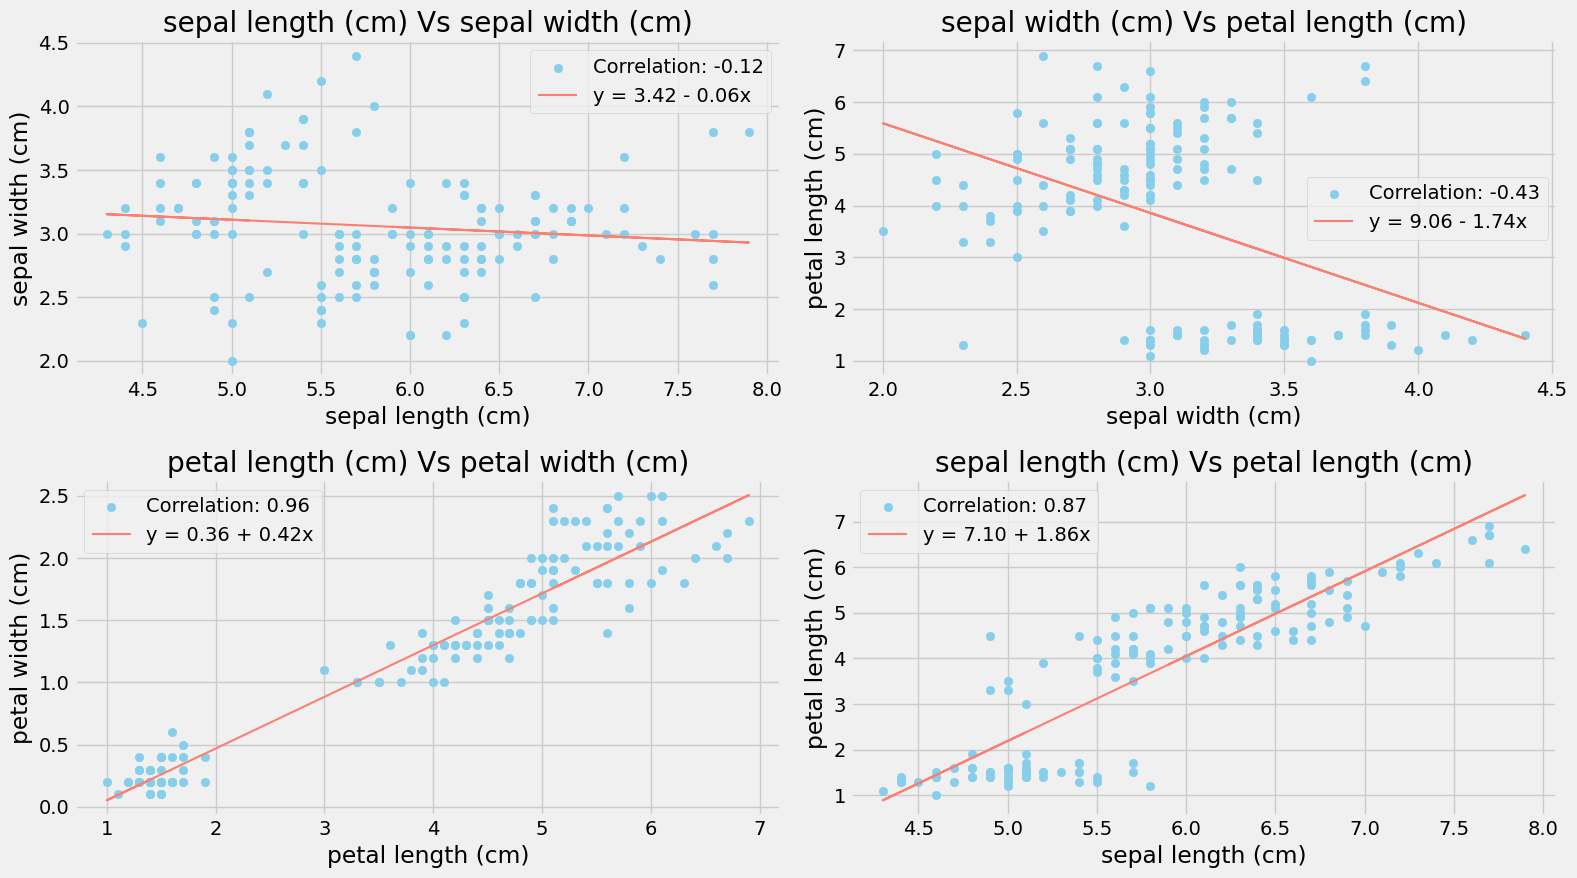

In [88]:
### Four combinations of variables to present

plots = [
    ("sepal length (cm)", "sepal width (cm)"),
    ("sepal width (cm)", "petal length (cm)"),
    ("petal length (cm)", "petal width (cm)"),
    ("sepal length (cm)", "petal length (cm)")
]

fig, axes = plt.subplots(2, 2, figsize=(16, 9))

for i, (x_feature, y_feature) in enumerate(plots):
    ax = axes[i // 2, i % 2]  # To access the appropriate subplot
    plot_regression(iris, x_feature, y_feature, ax)

plt.tight_layout()
plt.show()

1. **Sepal length (cm) vs Sepal width (cm)**:

   There is a very weak negative correlation between sepal length and sepal width. The regression line suggests a slight decrease in sepal width as sepal length increases, although the relationship is minimal and not strongly predictive.

2. **Sepal width (cm) vs Petal length (cm)**:

   There is a moderate negative correlation between sepal width and petal length. The regression line indicates that higher sepal width tends to correspond with shorter petal length, suggesting a somewhat predictive relationship between these two features.

3. **Petal length (cm) vs Petal width (cm)**:

   There is a very strong positive correlation between petal length and petal width. The regression line indicates that as petal length increases, petal width also increases proportionally. This relationship is highly predictive, suggesting that petal length can reliably predict petal width.

4. **Sepal length (cm) vs Petal length (cm)**:

   There is a strong positive correlation between sepal length and petal length. The regression line indicates that as sepal length increases, petal length also tends to increase significantly. This relationship is robust and suggests that sepal length can be a good predictor of petal length in the dataset.

# Predict target - machine learning approach

Root Mean Squared Error: 0.19
R2 Score: 0.95


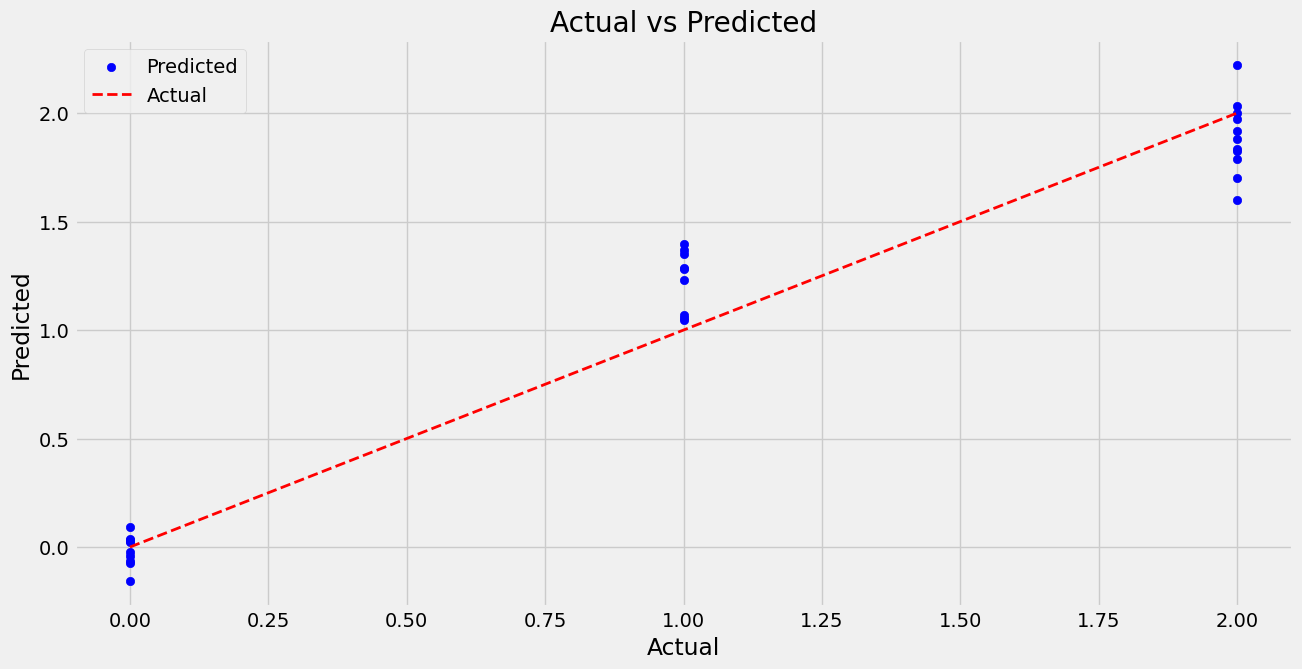

In [96]:
### Linear Regression - Machine Learning approach

X = iris[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Actual')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

Based on the metrics obtained from the linear regression model trained on the Iris dataset:

- **Root Mean Squared Error (RMSE)**: The RMSE value of 0.19 indicates that, on average, the model's predictions are approximately 0.19 units away from the actual values in the test set. Since the target variable in the Iris dataset is categorical (representing different flower species), this small RMSE suggests the model is quite precise in predicting the categorical labels.

- **R-squared (R2) Score**: The R2 score of 0.95 indicates that 95% of the variance in the target variable (species classification in this case) can be explained by the independent variables (features). This high R2 score suggests that the model fits the data very well and is able to capture most of the variability in the target variable.

Overall, based on the RMSE and R2 score, the linear regression model appears to be highly accurate for predicting the species of iris flowers based on their features. The small RMSE and high R2 score indicate strong predictive performance and a good fit of the model to the data.